## Toy example: Using the same regressor twice

This example will take a trivial case of having two regressors that are highly correlated and see if regressing the same component twice results in any re-introduction of artefacts.

The simplifying assumption is the noise components are identical between what is pulled out from ICA-AROMA as from another method (e.g. DVARS), while in reality they would be correlated, but not the same.

**H0**: If I apply the same regressor twice sequentially the "cleaned" data will be exactly the same.
- cleaned_once == cleaned_twice

**H1**: If I apply the same regressor twice sequentially the "cleaned" data will be different from the first to second application
- cleaned_once != cleaned_twice
- moreover, the addition of the second regression should make the data more correlated with the noise component


## Starting with Chris's setup
This is taken from Chris Gorgolewski's investigation of ICA-AROMA

In [127]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

num_samples = 400

agg_signal_shared_variance = []
nonagg_signal_shared_variance = []
ortho_signal_shared_variance_deltas = []
orig_signal_shared_variance = []

agg_noise_shared_variance = []
nonagg_noise_shared_variance = []
ortho_noise_shared_variance = []
orig_noise_shared_variance = []

agg_shared_variance = []
nonagg_shared_variance = []
ortho_shared_variance = []

for _ in range(200):
    # Generate the random samples.
    unique_noise = np.random.randn(num_samples,1)
    unique_signal = np.random.randn(num_samples,1)
    shared_variance = np.random.randn(num_samples,1)
    unexplained_bold_data = np.random.randn(num_samples,1)

    noise_component = 0.2*unique_noise + 0.2*shared_variance
    signal_component = 0.2*unique_signal + 0.2*shared_variance
    bold_data = 0.4*unexplained_bold_data + 0.2*unique_noise + 0.2*shared_variance + 0.2*unique_signal
    
    # JK: doing the first pass of regression
    agg_res = np.dot(noise_component, np.dot(bold_data.T, np.linalg.pinv(noise_component).T))
    newData_agg = bold_data - agg_res
    
    # JK: regressing the denoised data with the same noise regressor
    # this is supposed to simulate a situation where FD or DVARs shares a lot of variance with a noise component
    # from ICA AROMA, in this most extreme version, I'm just using the same noise component as the regressor again.
    
    agg_res2 = np.dot(noise_component, np.dot(newData_agg.T, np.linalg.pinv(noise_component).T))
    newData_agg2 = newData_agg - agg_res2

In [124]:
# what is the correlation between the bold data, the noise, and the signal?
np.corrcoef(np.concatenate([bold_data, noise_component, signal_component], axis=1).T)

array([[ 1.        ,  0.50217411,  0.48331507],
       [ 0.50217411,  1.        ,  0.49249272],
       [ 0.48331507,  0.49249272,  1.        ]])

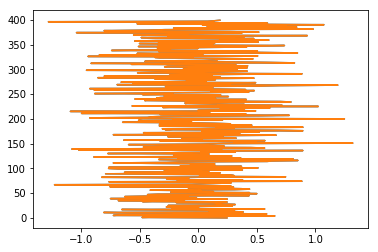

In [125]:
# Plot the data on top of each other, supports H0
plt.plot(newData_agg, np.arange(0, 400))
plt.plot(newData_agg2, np.arange(0, 400))

In [126]:
# observe the difference in between the datasets (if it exists), supports H0
newData_agg - newData_agg2

array([[ -2.77555756e-17],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [ -5.55111512e-17],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [ -5.55111512e-17],
       [  0.00000000e+00],
       [  8.32667268e-17],
       [ -5.55111512e-17],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  8.32667268e-17],
       [ -5.55111512e-17],
       [ -1.34441069e-17],
       [  0.00000000e+00],
       [  8.32667268e-17],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  1.38777878e-17],
       [  5.55111512e-17],
       [ -5.55111512e-17],
       [ -2.77555756e-17],
       [  2.77555756e-17],
       [  0.00000000e+00],
       [ -2.77555756e-17],
       [ -5.55111512e-17],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
 

In [128]:
# see if the correlations between components are 
display(np.corrcoef(np.concatenate([newData_agg, noise_component, signal_component], axis=1).T))
display(np.corrcoef(np.concatenate([newData_agg2, noise_component, signal_component], axis=1).T))

array([[  1.00000000e+00,   2.92960157e-04,   3.33706379e-01],
       [  2.92960157e-04,   1.00000000e+00,   5.05627895e-01],
       [  3.33706379e-01,   5.05627895e-01,   1.00000000e+00]])

array([[  1.00000000e+00,   2.92960157e-04,   3.33706379e-01],
       [  2.92960157e-04,   1.00000000e+00,   5.05627895e-01],
       [  3.33706379e-01,   5.05627895e-01,   1.00000000e+00]])